In [1]:
#employee turnover prediction
import pandas 
import numpy 
import matplotlib.pyplot as plt
import matplotlib as matplot
import seaborn as sns
import warnings


In [2]:
df = pandas.read_csv('HR_comma_sep.csv.txt')
df.head()

satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  Work_accident  left  promotion_last_5years  sales  \
0                   3              0     1                      0  sales   
1                   6              0     1                      0  sales   
2                   4              0     1                      0  sales   
3                   5              0     1                      0  sales   
4                   3              0     1                      0  sales   

   salary  
0     low  
1  medium  
2  medium  
3     low  
4     low

In [3]:
# Renaming certain columns for better readability
df = df.rename(columns={'satisfaction_level': 'satisfaction', 
                        'last_evaluation': 'evaluation',
                        'number_project': 'projectCount',
                        'average_montly_hours': 'averageMonthlyHours',
                        'time_spend_company': 'yearsAtCompany',
                        'Work_accident': 'workAccident',
                        'promotion_last_5years': 'promotion',
                        'sales' : 'department',
                        'left' : 'turnover'
                        })

In [4]:
df.shape

(14999, 10)

In [5]:
df.head()

satisfaction  evaluation  projectCount  averageMonthlyHours  \
0          0.38        0.53             2                  157   
1          0.80        0.86             5                  262   
2          0.11        0.88             7                  272   
3          0.72        0.87             5                  223   
4          0.37        0.52             2                  159   

   yearsAtCompany  workAccident  turnover  promotion department  salary  
0               3             0         1          0      sales     low  
1               6             0         1          0      sales  medium  
2               4             0         1          0      sales  medium  
3               5             0         1          0      sales     low  
4               3             0         1          0      sales     low

In [6]:
round(df.turnover.value_counts(1), 2)

0    0.76
1    0.24
Name: turnover, dtype: float64

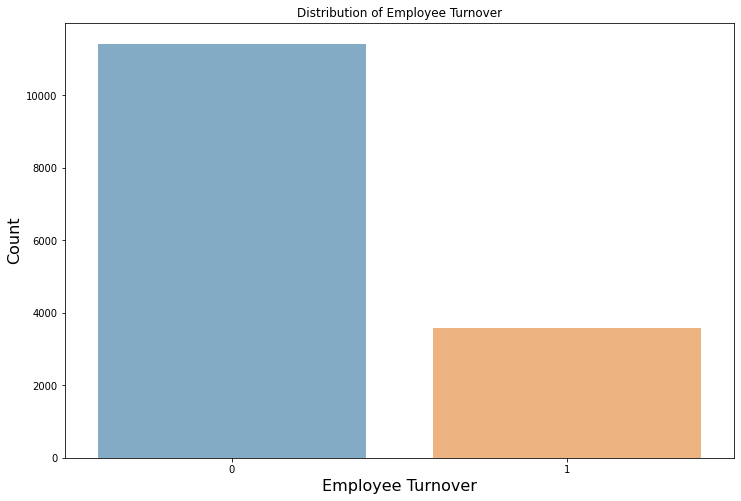

In [7]:
plt.figure(figsize=(12,8))
turnover = df.turnover.value_counts()
sns.barplot(y=turnover.values, x=turnover.index, alpha=0.6)
plt.title('Distribution of Employee Turnover')
plt.xlabel('Employee Turnover', fontsize=16)
plt.ylabel('Count', fontsize=16);

DATA_QUALITY_CHECK

In [8]:
# Can you check to see if there are any missing values in our data set
df.isnull().any()

satisfaction           False
evaluation             False
projectCount           False
averageMonthlyHours    False
yearsAtCompany         False
workAccident           False
turnover               False
promotion              False
department             False
salary                 False
dtype: bool

In [9]:
# Check the type of our features. Are there any data inconsistencies?
df.dtypes

satisfaction           float64
evaluation             float64
projectCount             int64
averageMonthlyHours      int64
yearsAtCompany           int64
workAccident             int64
turnover                 int64
promotion                int64
department              object
salary                  object
dtype: object

In [10]:
# Display the statistical overview of the employees
round(df.describe(), 2)

satisfaction  evaluation  projectCount  averageMonthlyHours  \
count      14999.00    14999.00      14999.00             14999.00   
mean           0.61        0.72          3.80               201.05   
std            0.25        0.17          1.23                49.94   
min            0.09        0.36          2.00                96.00   
25%            0.44        0.56          3.00               156.00   
50%            0.64        0.72          4.00               200.00   
75%            0.82        0.87          5.00               245.00   
max            1.00        1.00          7.00               310.00   

       yearsAtCompany  workAccident  turnover  promotion  
count        14999.00      14999.00  14999.00   14999.00  
mean             3.50          0.14      0.24       0.02  
std              1.46          0.35      0.43       0.14  
min              2.00          0.00      0.00       0.00  
25%              3.00          0.00      0.00       0.00  
50%              3.00          0.00      0.00       0.00  
75%              4.00          0.00      0.00       0.00  
max             10.00          1.00      1.00       1.00

In [11]:
# Display the mean summary of Employees (Turnover V.S. Non-turnover). What do you notice between the groups?
turnover_Summary = df.groupby('turnover')

CORRELATION_MATRIX

In [12]:
# Create a correlation matrix. What features correlate the most with turnover? What other correlations did you find?
corr = df.corr()
corr

satisfaction  evaluation  projectCount  \
satisfaction             1.000000    0.105021     -0.142970   
evaluation               0.105021    1.000000      0.349333   
projectCount            -0.142970    0.349333      1.000000   
averageMonthlyHours     -0.020048    0.339742      0.417211   
yearsAtCompany          -0.100866    0.131591      0.196786   
workAccident             0.058697   -0.007104     -0.004741   
turnover                -0.388375    0.006567      0.023787   
promotion                0.025605   -0.008684     -0.006064   

                     averageMonthlyHours  yearsAtCompany  workAccident  \
satisfaction                   -0.020048       -0.100866      0.058697   
evaluation                      0.339742        0.131591     -0.007104   
projectCount                    0.417211        0.196786     -0.004741   
averageMonthlyHours             1.000000        0.127755     -0.010143   
yearsAtCompany                  0.127755        1.000000      0.002120   
workAccident                   -0.010143        0.002120      1.000000   
turnover                        0.071287        0.144822     -0.154622   
promotion                      -0.003544        0.067433      0.039245   

                     turnover  promotion  
satisfaction        -0.388375   0.025605  
evaluation           0.006567  -0.008684  
projectCount         0.023787  -0.006064  
averageMonthlyHours  0.071287  -0.003544  
yearsAtCompany       0.144822   0.067433  
workAccident        -0.154622   0.039245  
turnover             1.000000  -0.061788  
promotion           -0.061788   1.000000

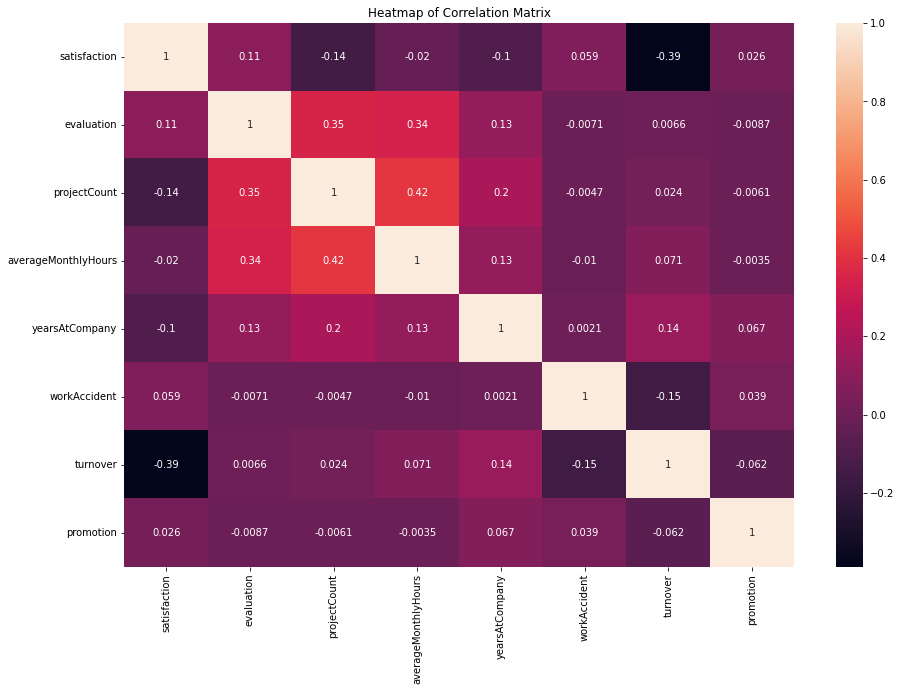

In [13]:
plt.figure(figsize=(15,10))
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, annot=True)
plt.title('Heatmap of Correlation Matrix');

EDA1

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


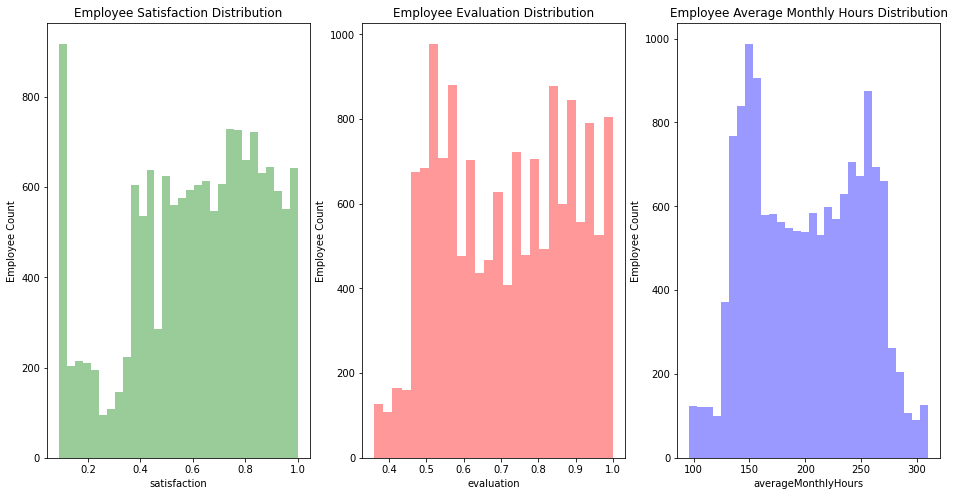

In [14]:
# Plot the distribution of Employee Satisfaction, Evaluation, and Project Count. What story can you tell?

# Set up the matplotlib figure
f, axes = plt.subplots(ncols=3, figsize=(16, 8))

# Graph Employee Satisfaction
sns.distplot(df.satisfaction, kde=False, color="g", ax=axes[0]).set_title('Employee Satisfaction Distribution')
axes[0].set_ylabel('Employee Count');

# Graph Employee Evaluation
sns.distplot(df.evaluation, kde=False, color="r", ax=axes[1]).set_title('Employee Evaluation Distribution')
axes[1].set_ylabel('Employee Count');

# Graph Employee Average Monthly Hours
sns.distplot(df.averageMonthlyHours, kde=False, color="b", ax=axes[2]).set_title('Employee Average Monthly Hours Distribution')
axes[2].set_ylabel('Employee Count');

EDA2

<Figure size 1080x720 with 0 Axes>

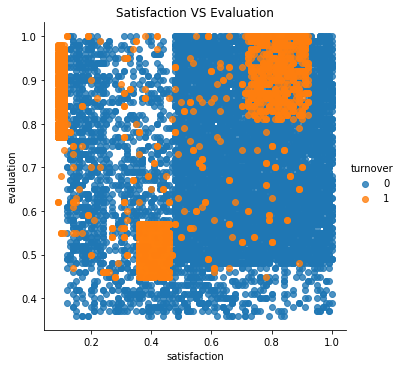

In [15]:
plt.figure(figsize=(15,10))
sns.lmplot(x='satisfaction', y='evaluation', data=df, fit_reg=False, hue='turnover') # Color by turnover value
plt.title('Satisfaction VS Evaluation');

PRE-PROCESSING

In [16]:
cat_var = ['department','salary','turnover','promotion']
num_var = ['satisfaction','evaluation','projectCount','averageMonthlyHours','yearsAtCompany', 'workAccident']
categorical_df = pandas.get_dummies(df[cat_var], drop_first=True, dummy_na=True)
numerical_df = df[num_var]

new_df = pandas.concat([categorical_df,numerical_df], axis=1)
new_df.head()

turnover  promotion  department_RandD  department_accounting  \
0         1          0                 0                      0   
1         1          0                 0                      0   
2         1          0                 0                      0   
3         1          0                 0                      0   
4         1          0                 0                      0   

   department_hr  department_management  department_marketing  \
0              0                      0                     0   
1              0                      0                     0   
2              0                      0                     0   
3              0                      0                     0   
4              0                      0                     0   

   department_product_mng  department_sales  department_support  ...  \
0                       0                 1                   0  ...   
1                       0                 1                   0  ...   
2                       0                 1                   0  ...   
3                       0                 1                   0  ...   
4                       0                 1                   0  ...   

   department_nan  salary_low  salary_medium  salary_nan  satisfaction  \
0               0           1              0           0          0.38   
1               0           0              1           0          0.80   
2               0           0              1           0          0.11   
3               0           1              0           0          0.72   
4               0           1              0           0          0.37   

   evaluation  projectCount  averageMonthlyHours  yearsAtCompany  workAccident  
0        0.53             2                  157               3             0  
1        0.86             5                  262               6             0  
2        0.88             7                  272               4             0  
3        0.87             5                  223               5             0  
4        0.52             2                  159               3             0  

[5 rows x 21 columns]

In [17]:
new_df.shape

(14999, 21)

Split train/test set

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, confusion_matrix, precision_recall_curve

# Create the X and y set
X = new_df.iloc[:,1:]
y = new_df.iloc[:,0]

# Define train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=123, stratify=y)

In [19]:
print(X_train.shape)
print(X_test.shape)

(11999, 20)
(3000, 20)


Class Imbalance

In [20]:
round(df.turnover.value_counts(1), 2)

0    0.76
1    0.24
Name: turnover, dtype: float64

**How to treat class imbalance in datasets**

  There are many ways of dealing with class imbalance data. We will focus on the following approaches ->

    1.   Oversampling - SMOTE
    2.   Upsampling and Downsampling



In [21]:
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE 

# Upsample minority class
X_train_u, y_train_u = resample(X_train[y_train == 1],
                                y_train[y_train == 1],
                                replace=True,
                                n_samples=X_train[y_train == 0].shape[0],
                                random_state=1)
X_train_u = numpy.concatenate((X_train[y_train == 0], X_train_u))
y_train_u = numpy.concatenate((y_train[y_train == 0], y_train_u))


# Upsample using SMOTE
sm = SMOTE(random_state=12, sampling_strategy = 1.0)
x_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)


# Downsample majority class
X_train_d, y_train_d = resample(X_train[y_train == 0],
                                y_train[y_train == 0],
                                replace=True,
                                n_samples=X_train[y_train == 1].shape[0],
                                random_state=1)
X_train_d = numpy.concatenate((X_train[y_train == 1], X_train_d))
y_train_d = numpy.concatenate((y_train[y_train == 1], y_train_d))

In [22]:
print("Original shape:", X_train.shape, y_train.shape)
print("Upsampled shape:", X_train_u.shape, y_train_u.shape)
print ("SMOTE sample shape:", x_train_sm.shape, y_train_sm.shape)
print("Downsampled shape:", X_train_d.shape, y_train_d.shape)

Original shape: (11999, 20) (11999,)
Upsampled shape: (18284, 20) (18284,)
SMOTE sample shape: (18284, 20) (18284,)
Downsampled shape: (5714, 20) (5714,)


Now which sampling technique to use for the model?

**Apply 5-Fold Cross Validation for Logistic Regression**

Objective:Train our Logistic Regression Model to our original, upsampled, and downsampled data to see which performs best.

Result:

    Original Sample: F1 Score 49.50771778599707%
    Upsampled data: F1 Score 76.41601970261777%
    SMOTE: F1 Score 78.77848483907197%
    Downsample: F1 Score 77.46611665289641%

SMOTE gives us the best performance

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

In [24]:
# Create the Original, Upsampled, and Downsampled training sets
methods_data = {"Original": (X_train, y_train),
                "Upsampled": (X_train_u, y_train_u),
                "Downsampled": (X_train_d, y_train_d),
                "SMOTE":(x_train_sm, y_train_sm)}

# Loop through each type of training sets and apply 5-Fold CV using Logistic Regression
# By default in cross_val_score StratifiedCV is used
for method in methods_data.keys():
    lr_results = cross_val_score(LogisticRegression(), 
                                 methods_data[method][0], 
                                 methods_data[method][1], 
                                 cv=5, 
                                 scoring='f1')
    print(f"The best F1 Score for {method} data:")
    print (lr_results.mean())
 

# cross_val_score(LogisticRegression(class_weight='balanced'), X_train, y_train, cv=5, scoring='f1').mean()

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


The best F1 Score for Original data:
0.4950771778599707


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


The best F1 Score for Upsampled data:
0.7641601970261777


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


The best F1 Score for Downsampled data:
0.7746611665289641


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


The best F1 Score for SMOTE data:
0.7877848483907197


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


We are training 3 models->
1. Logistic Regression
2. Decision Tree Classifier
3. Support Vector Machine

**Logistic Regression Classifier**

In [25]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score

lr = LogisticRegression()
lr = lr.fit(x_train_sm, y_train_sm)
lr

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

Apply 5-fold cross validation on logistic regression

F1 score - 0.7877848483907197

In [26]:
lr_result = cross_val_score(lr, x_train_sm, y_train_sm, cv=5, scoring='f1')
lr_result.mean()

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


0.7877848483907197

Logistic Regression AUC (0.77)

In [27]:
print ("\n\n ---Logistic Regression Model---")
lr_auc = roc_auc_score(y_test, lr.predict(X_test))

print ("Logistic Regression AUC = %2.2f" % lr_auc)

lr2 = lr.fit(x_train_sm, y_train_sm)
print(classification_report(y_test, lr.predict(X_test)))



 ---Logistic Regression Model---
Logistic Regression AUC = 0.77
              precision    recall  f1-score   support

           0       0.92      0.75      0.83      2286
           1       0.50      0.79      0.61       714

    accuracy                           0.76      3000
   macro avg       0.71      0.77      0.72      3000
weighted avg       0.82      0.76      0.78      3000



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


**Decision Tree Classifier**

In [28]:
from sklearn.tree import DecisionTreeClassifier  

dtc= DecisionTreeClassifier(criterion='entropy', random_state=0)  
dtc.fit(x_train_sm, y_train_sm)
dtc

DecisionTreeClassifier(criterion='entropy', random_state=0)

Apply 5-fold cross validation on Decision Tree

F1 score - 0.7877848483907197



In [29]:
dtc_result = cross_val_score(lr, x_train_sm, y_train_sm, cv=5, scoring='f1')
dtc_result.mean()

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


0.7877848483907197

Decision Tree Classifier AUC(0.97)

In [31]:
from sklearn.metrics import roc_auc_score

print ("\n\n ---Decision Tree Model---")
dtc_roc_auc = roc_auc_score(y_test, dtc.predict(X_test))
print ("Decision Tree AUC = %2.2f" % dtc_roc_auc)
print(classification_report(y_test, dtc.predict(X_test)))



 ---Decision Tree Model---
Decision Tree AUC = 0.97
              precision    recall  f1-score   support

           0       0.99      0.96      0.98      2286
           1       0.89      0.98      0.93       714

    accuracy                           0.97      3000
   macro avg       0.94      0.97      0.95      3000
weighted avg       0.97      0.97      0.97      3000



**Random Forest Classifier**

In [32]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest Model
rf = RandomForestClassifier()
rf = rf.fit(x_train_sm, y_train_sm)
rf

RandomForestClassifier()

Apply 5-fold cross validation on Random Forest Classifier



In [33]:
rf_result = cross_val_score(rf, x_train_sm, y_train_sm, cv=5, scoring='f1')
rf_result.mean()

0.9801490810930389

Random Forest Classifier AUC (0.98)

In [34]:
from sklearn.metrics import roc_auc_score

print ("\n\n ---Random Forest Model---")
rf_roc_auc = roc_auc_score(y_test, rf.predict(X_test))
print ("Random Forest AUC = %2.2f" % rf_roc_auc)
print(classification_report(y_test, rf.predict(X_test)))



 ---Random Forest Model---
Random Forest AUC = 0.98
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2286
           1       0.97      0.98      0.97       714

    accuracy                           0.99      3000
   macro avg       0.98      0.98      0.98      3000
weighted avg       0.99      0.99      0.99      3000



**Model Evaluation**

F1 Score & ROC/AUC

ROC Graph

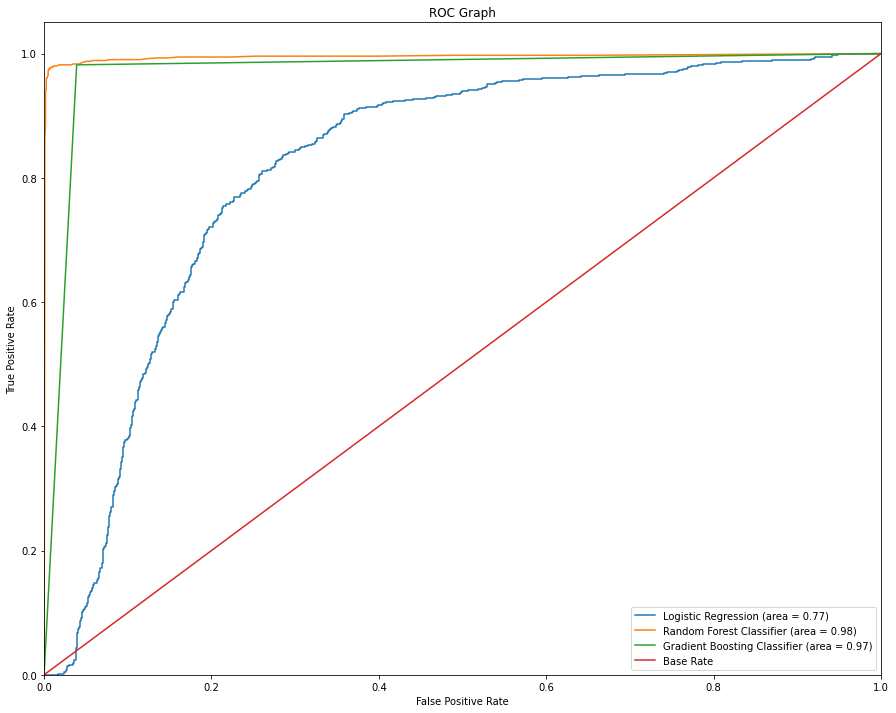

In [36]:
# Create ROC Graph
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix

fpr, tpr, thresholds = roc_curve(y_test, lr.predict_proba(X_test)[:,1])
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, rf.predict_proba(X_test)[:,1])
dtc_fpr, dtc_tpr, dtc_thresholds = roc_curve(y_test, dtc.predict_proba(X_test)[:,1])


plt.figure(figsize=(15,12))

# Plot Logistic Regression ROC
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % lr_auc)

# Plot Random Forest ROC
plt.plot(rf_fpr, rf_tpr, label='Random Forest Classifier (area = %0.2f)' % rf_roc_auc)

# Plot Decision Tree ROC
plt.plot(dtc_fpr, dtc_tpr, label='Gradient Boosting Classifier (area = %0.2f)' % dtc_roc_auc)

# Plot Base Rate ROC
plt.plot([0,1], [0,1],label='Base Rate')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Graph')
plt.legend(loc="lower right")
plt.show();

In [37]:
# Confusion Matrix for Logistic Regresion
confusion_matrix(y_test, lr.predict(X_test))

array([[1720,  566],
       [ 153,  561]])

In [39]:
# Confusion Matrix for GBC
confusion_matrix(y_test, dtc.predict(X_test))

array([[2197,   89],
       [  13,  701]])

In [40]:
# Confusion Matrix for Random Forest
confusion_matrix(y_test, rf.predict(X_test))

array([[2264,   22],
       [  15,  699]])

Feature Importance

In [42]:
# Get Feature Importances
feature_importances = pandas.DataFrame(rf.feature_importances_,
                                   index = x_train_sm.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)

feature_importances = feature_importances.reset_index()
feature_importances

index  importance
0             satisfaction    0.264076
1           yearsAtCompany    0.231752
2      averageMonthlyHours    0.164218
3             projectCount    0.146317
4               evaluation    0.132862
5             workAccident    0.023283
6               salary_low    0.007322
7         department_sales    0.004533
8            salary_medium    0.004433
9     department_technical    0.004225
10      department_support    0.003006
11   department_management    0.002475
12               promotion    0.002398
13        department_RandD    0.002386
14  department_product_mng    0.001835
15   department_accounting    0.001827
16    department_marketing    0.001577
17           department_hr    0.001475
18              salary_nan    0.000000
19          department_nan    0.000000

**Retention Plan**

We should refrain from soley relying on the output of our model. Instead, we can use it's probability output and design our own system to treat each employee accordingly. 

In [43]:
# Ranking turnover probability for employees
rf.predict_proba(X_test)[175:185]

array([[0.98, 0.02],
       [1.  , 0.  ],
       [0.98, 0.02],
       [0.  , 1.  ],
       [0.  , 1.  ],
       [0.86, 0.14],
       [0.83, 0.17],
       [0.01, 0.99],
       [0.17, 0.83],
       [0.96, 0.04]])

In [44]:
list(rf.predict_proba(X_test)[175:185, 1])

[0.02, 0.0, 0.02, 1.0, 1.0, 0.14, 0.17, 0.99, 0.83, 0.04]

In [45]:
list(rf.predict_proba(X_test)[175:185, 1] > 0.2)

[False, False, False, True, True, False, False, True, True, False]

**Conclusion**

*What To Optimize?*

In our employee retention problem, rather than simply predicting whether an employee will leave the company within a certain time frame, we would much rather have an estimate of the probability that he/she will leave the company. We would rank employees by their probability of leaving, then allocate a limited incentive budget to the highest probability instances.